In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.simplefilter('ignore')

## データの読み込み

In [2]:
# データの読み込み
# df_org = pd.read_csv('./data/input_01.csv')
# df_org = pd.read_csv('./data/input_02.csv')
# df_org = pd.read_csv('./data/input_03.csv')
# df_org = pd.read_csv('./data/input_04.csv')
df_org = pd.read_csv('./data/input_05.csv')

In [3]:
# データ量が多いのでコーディング中はサンプリング
# df = df_org.sample(100000, replace=True)
df = df_org

In [4]:
df.head()

,Unnamed: 0,ID,name,category,main_category,currency,deadline,goal,launched,pledged,...,Last_3_Month,Last_Year,mean_goal_in_category_last_month,median_goal_in_category_last_month,mean_goal_in_category_last_year,median_goal_Last_6_Month,mean_goal_Last_6_Month,mean_goal_Last_Week,name_len,name_number_of_word
0,0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,...,0,192,NaN,NaN,10028.166667,NaN,NaN,NaN,31.0,6
1,1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,...,6,6,8116.666667,5850.0,8116.666667,5850.0,8116.666667,8116.666667,45.0,8
2,2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,...,0,5266,NaN,NaN,89715.024206,NaN,NaN,NaN,14.0,3
3,3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,...,1,1317,NaN,NaN,16377.924184,3000.0,3000.000000,NaN,49.0,7
4,5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,...,5,5312,NaN,NaN,54944.234121,10000.0,45621.972175,NaN,20.0,3


In [5]:
df.columns

Index(['Unnamed: 0', 'ID', 'name', 'category', 'main_category', 'currency',
       'deadline', 'goal', 'launched', 'pledged', 'state', 'backers',
       'country', 'usd pledged', 'usd_pledged_real', 'usd_goal_real', 'period',
       'launched_year', 'launched_month', 'launched_day', 'class',
       'name_vowel_ratio', 'n_words', 'log_goal', 'Goal_1000', 'Goal_500',
       'Goal_10', 'median_goal_Last_Week', 'Last_Week', 'Last_Month',
       'Last_6_Month', 'Last_3_Month', 'Last_Year',
       'mean_goal_in_category_last_month',
       'median_goal_in_category_last_month', 'mean_goal_in_category_last_year',
       'median_goal_Last_6_Month', 'mean_goal_Last_6_Month',
       'mean_goal_Last_Week', 'name_len', 'name_number_of_word'],
      dtype='object')

In [6]:
df[['usd_goal_real', 'log_goal']].head()

,usd_goal_real,log_goal
0,1533.95,7.335601
1,30000.00,10.308953
2,45000.00,10.714418
3,5000.00,8.517193
4,50000.00,10.819778


<AxesSubplot:>

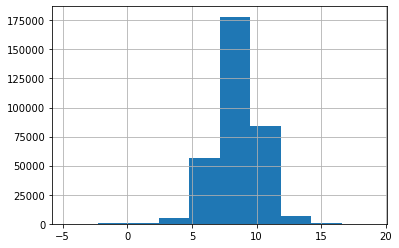

In [7]:
# 対数変換してるのに40000はさすがにおかしい
df['log_goal'].hist()

In [8]:
# この外れ値除去を行うと、最終的な精度が悪化した
med = df['usd_goal_real'].median()
MAD = 1.4826 * np.median(abs(df['usd_goal_real']-med))
df = df[(med - 3 * MAD < df['usd_goal_real']) & (df['usd_goal_real'] < med + 3 * MAD)]

In [9]:
df['log_goal'] = np.log(df['usd_goal_real'])

<AxesSubplot:>

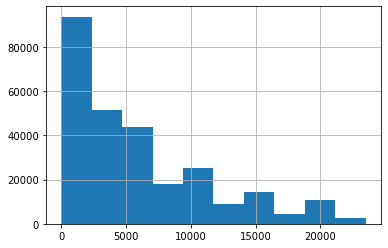

In [10]:
df['usd_goal_real'].hist()


<AxesSubplot:>

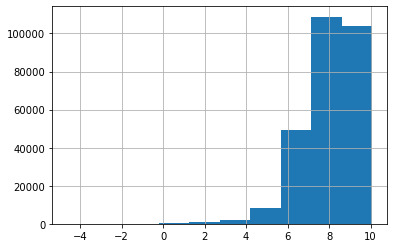

In [12]:
df['log_goal'].hist()


<AxesSubplot:>

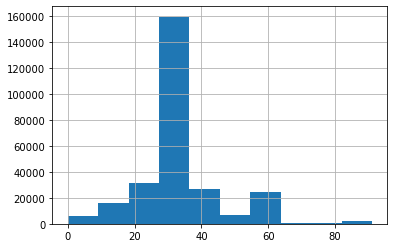

In [13]:
df['period'].hist()

In [14]:
# ここでNaNが多いものはできれば除きたい
df.isnull().sum()

Unnamed: 0                                 0
ID                                         0
name                                       1
category                                   0
main_category                              0
currency                                   0
deadline                                   0
goal                                       0
launched                                   0
pledged                                    0
state                                      0
backers                                    0
country                                    0
usd pledged                              205
usd_pledged_real                           0
usd_goal_real                              0
period                                     0
launched_year                              0
launched_month                             0
launched_day                               0
class                                      0
name_vowel_ratio                           0
n_words   

## データの準備

In [15]:
# 数値エンコーディング（GBDT以外の場合は必須）
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df = df.apply(encoder.fit_transform)

In [16]:
df.head()

,Unnamed: 0,ID,name,category,main_category,currency,deadline,goal,launched,pledged,...,Last_3_Month,Last_Year,mean_goal_in_category_last_month,median_goal_in_category_last_month,mean_goal_in_category_last_year,median_goal_Last_6_Month,mean_goal_Last_6_Month,mean_goal_Last_Week,name_len,name_number_of_word
0,0,127038,237239,108,12,5,2282,689,181930,0,...,0,66,239,85,81,94,333,211,30,5
3,1,127039,245870,90,10,13,1011,2405,39682,1,...,1,136,239,85,164,20,8,211,48,6
5,2,127040,208791,58,7,13,1990,689,144779,4362,...,0,64,239,85,216,68,198,211,59,8
7,3,12597,159964,95,12,1,1552,1455,89488,0,...,0,276,239,85,150,48,150,211,18,3
8,4,12598,133264,72,10,13,1368,4090,71857,27525,...,0,78,239,85,108,37,142,211,15,3


In [17]:
y = df[['state']]
# x_cols = ['class', 'country', 'period', 'log_goal', 'launched_year', 'launched_month', 'launched_day', 
#          'name_vowel_ratio', 'Goal_1000', 'Goal_10', 'Last_Year', 'name_len', 'name_number_of_word', 
#           'mean_goal_in_category_last_month', 'mean_goal_in_category_last_year','mean_goal_Last_6_Month']
# x_cols = ['class', 'country', 'period', 'n_words', 'log_goal', 'launched_year', 'launched_month', 'launched_day', 
#          'name_vowel_ratio', 'Goal_1000', 'Goal_500', 'Goal_10', 'median_goal_Last_Week']
x_cols = ['class', 'period', 'log_goal', 'name_vowel_ratio', 'name_len', 'country', 
         'launched_day', 'launched_month', 'launched_year', 'Last_Year', 'Last_Month', 'Last_Week', 
         'mean_goal_in_category_last_year']
x = df[x_cols]

In [18]:
y.head()

,state
0,0
3,0
5,1
7,0
8,1


In [19]:
x.head()

,class,period,log_goal,name_vowel_ratio,name_len,country,launched_day,launched_month,launched_year,Last_Year,Last_Month,Last_Week,mean_goal_in_category_last_year
0,97,58,10270,392,30,9,10,7,6,66,0,0,81
3,78,29,19451,382,48,22,16,2,3,136,0,0,164
5,53,19,7777,449,59,22,0,11,5,64,0,0,216
7,95,29,13361,307,18,3,8,8,4,276,0,0,150
8,75,29,28269,328,15,22,8,2,4,78,0,0,108


## モデル学習（単体）

In [20]:
from sklearn.model_selection import train_test_split

# 訓練データとテストデータを8:2に分割
# ※評価を揃えるため df 以外の引数は変更しないこと
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1234)

In [21]:
import lightgbm as lgb
from sklearn.metrics import log_loss, roc_auc_score, accuracy_score

# パラメータ
RANDOM_STATE = 10
num_round = 1000
TEST_SIZE = 0.2

# 学習データと評価データを作成
x_train, x_valid, y_train, y_valid = train_test_split(x_train,y_train,test_size=TEST_SIZE,random_state=RANDOM_STATE)

lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_valid, y_valid, reference=lgb_train)

In [22]:
# LightGBMのパラメータ設定
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 50,
    'verbose': 0
}

In [23]:
# 訓練データに対する予測
# LightGBM学習
model = lgb.train(params, lgb_train, num_round, 
                  valid_names=['train', 'valid'], valid_sets=lgb_eval,
                  early_stopping_rounds=20, verbose_eval=False)

# LightGBM推論
y_pred = model.predict(x_valid, num_iteration=model.best_iteration)

# 評価
y_pred = y_pred.round(0)
# acc_train = accuracy_score(y_test, y_pred)
acc_train = accuracy_score(y_true=y_valid, y_pred=y_pred)

print(f"訓練データの正答率: {100 * acc_train:.3f} %")    

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005347 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
訓練データの正答率: 67.399 %


In [24]:
# テストデータに対する予測
# LightGBM推論
y_pred = model.predict(x_test, num_iteration=model.best_iteration)
y_pred = y_pred.round(0)

# 評価
acc_train = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f"テストデータの正答率: {100 * acc_train:.3f} %")  

# print(y_test)
# print(y_pred)

テストデータの正答率: 67.550 %


In [25]:
# feature importance for Light GBM
predictor_columns = x_train.columns
importance = pd.DataFrame(model.feature_importance(), index=predictor_columns, columns=['importance'])
# display(importance)
display(importance.sort_values('importance', ascending = False))

# predictor_columns = x_train.columns
# feat_import = list(zip(predictor_columns, list(model.feature_importances())))
# ns_df = pd.DataFrame(data = feat_import, columns=['Feat_names', 'Importance'])
# ns_df_sorted = ns_df.sort_values(['Importance', 'Feat_names'], ascending = [False, True])

# ns_df_sorted

,importance
class,2325
log_goal,1525
name_vowel_ratio,1302
name_len,1225
period,1197
launched_day,922
mean_goal_in_category_last_year,777
Last_Year,689
launched_year,657
launched_month,609


## 交差検証

In [26]:
# !pip install lightgbm

In [27]:
from sklearn.model_selection import KFold
n_split = 5 # グループ数を設定（今回は5分割）
seed = 1234
# cross_valid_mae = 0
split_num = 1
kf = KFold(n_splits=n_split, shuffle=True, random_state=seed)

In [28]:
from sklearn.metrics import log_loss, roc_auc_score, accuracy_score
import lightgbm as lgb

# scores_train = []
scores_valid = []
models = []
itr = 1

for train_idx, valid_idx in kf.split(x, y):
    x_train, y_train = x.iloc[train_idx], y.iloc[train_idx]
    x_valid, y_valid = x.iloc[valid_idx], y.iloc[valid_idx]
    
    # lightgbmのデータ構造に変換
    lgb_train = lgb.Dataset(x_train, y_train)
    lgb_valid = lgb.Dataset(x_valid, y_valid)
    
    # ハイパーパラメータの設定
    # metricsはaccuracy_scoreにすべきかも
    params = {'num_leaves': 64, 'objective': 'binary', 'seed': seed, 
              'verbose': 0, 'metrics': 'binary_logloss'}
    num_round = 1000

    # 学習の実行
    # カテゴリ変数を指定した場合の挙動はKaggle本 p240参照
    # categorical_features = ['category', 'main_category', 'currency', 'country']
    model = lgb.train(params, lgb_train, num_round, 
                    valid_names=['train', 'valid'], valid_sets=[lgb_train, lgb_valid],
                     early_stopping_rounds=20, verbose_eval=False)
    
    # # 訓練データに対する予測、正答率
    # y_pred = clf.predict(x_train)
    # acc_train = accuracy_score(y_true=y_train, y_pred=y_pred)
    # print(f"{itr:02}train_訓練データの正答率: {100 * acc_train:.2f} %")
    # scores_train.append(acc_train)  
    
    # 検証データに対する予測
    # accurasy_scoreするには0で丸め込みが必要（https://shiokoji11235.com/two_interface_of_lightgbm）
    y_pred = model.predict(x_valid)
    y_pred = y_pred.round(0)

    score_valid = accuracy_score(y_valid, y_pred)
    print(f"{itr:02}valid_accuracy_score: {score_valid:.4f} %")    

    # score_valid = log_loss(y_true=y_valid, y_pred=y_pred)
    # print(f"{itr:02}valid_logloss: {score_valid:.4f} %")    
    # score_valid = roc_auc_score(y_valid, y_pred)
    # print(f"{itr:02}valid_auc_score: {score_valid:.4f} %")    

    scores_valid.append(score_valid)    
    models.append(model)
    
    itr += 1

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
01valid_accuracy_score: 0.6777 %
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004705 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
02valid_accuracy_score: 0.6764 %
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005112 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
03valid_accuracy_score: 0.6745 %
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005226 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_c

In [29]:
# 各foldのスコアの平均
# print(np.mean(scores_train))
print(np.mean(scores_valid))

0.6763439225997393


## 推論

In [30]:
y_preds = np.zeros(len(x_test))

for model in models:
    y_pred = model.predict(x_test)
    y_pred = y_pred.round(0)
    y_preds += y_pred / len(models)
    
# print(y_test)
# print('***')
# print(y_preds)
# print('***')
# print(y_pred)

y_preds = y_preds.round(0)
score_test = accuracy_score(y_test, y_preds)
print(f"test_accuracy_score: {score_test:.4f} %")    

test_accuracy_score: 0.7024 %


### input_01.csv
- 検証データに対する正答率：0.69899


### input_02.csv（class, main_category）
- 検証データに対する正答率：0.70896


### input_02.csv（class）
- 検証データに対する正答率：0.70765


### input_03.csv（class, yar/month/day）
- 検証データに対する正答率：0.7159


### input_04.csv
- ：71.78%
x_cols = ['class', 'country', 'period', 'n_words', 'log_goal', 'launched_year', 'launched_month', 'launched_day', 
         'name_vowel_ratio', 'Goal_1000', 'Goal_500', 'Goal_10', 'median_goal_Last_Week']

## テストデータに対する予測
本来はtrain/validではなくtrain/valid/testに分割し、testに対する予測を見るべき